In [1]:
import dvc.api
import sys
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preprocessing import data_preProcessing_script
from cleaner import DataCleaner
from exploratory import exploration

In [3]:
def get_data(path,repo,version):
    data_url = dvc.api.get_url(
    path=path,
    repo=repo,
    rev=version
    )
    df = pd.read_csv(data_url)
    return df

#### Load Data

In [ ]:
driver_location_data = get_data('data/driver_locations_during_request.csv','C:/Users/User/hp/Causal-Inference','driver_locations_during_request_v1')
nb_data = get_data('data/nb.csv','C:/Users/User/hp/Causal-Inference','nb_v1')

In [5]:
preprocess = data_preProcessing_script(driver_location_data)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [6]:
preprocess = data_preProcessing_script(nb_data)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [7]:
print('unique column values')
driver_location_data.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)

unique column values


id               1557740
lat               194406
lng               170385
order_id           26492
driver_id           1213
driver_action          2
created_at             1
updated_at             1
dtype: int64

In [8]:
print('unique column values')
nb_data.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)

unique column values


Trip ID             536020
Trip End Time       513855
Trip Start Time     512517
Trip Destination    147520
Trip Origin         112142
dtype: int64

#### Missing Value Manipulation

In [9]:
preprocess.colums_WithMissingValue()

['Trip Start Time', 'Trip End Time']

In [10]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Trip ID,0,0.0 %
Trip Origin,0,0.0 %
Trip Destination,0,0.0 %
Trip Start Time,1651,0.31 %
Trip End Time,1,0.0 %


Text(0, 0.5, 'Features')

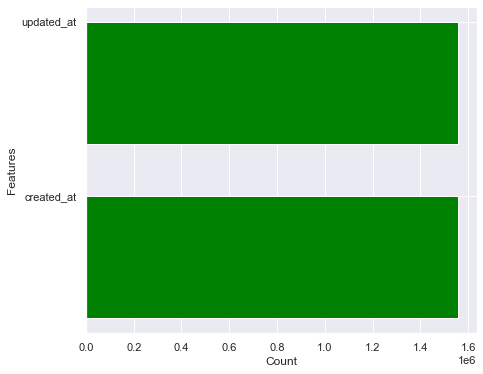

In [11]:
cols_with_missing = driver_location_data.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features') 

In [12]:
driver_location_data.drop(["updated_at"], axis=1, inplace=True)

In [13]:
preprocess.colums_WithMissingValue()

['Trip Start Time', 'Trip End Time']

#### Data Wrangling

In [14]:
preprocess.show_datatypes()

Trip ID              int64
Trip Origin         object
Trip Destination    object
Trip Start Time     object
Trip End Time       object
dtype: object

In [15]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{driver_location_data.shape}')

Shapes of our datasets
-----------------------
Training dataset:(1557740, 7)


In [16]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{nb_data.shape}')

Shapes of our datasets
-----------------------
Training dataset:(536020, 5)


In [17]:
preprocess.show_data_description()

,Trip ID
count,5.360200e+05
mean,9.910221e+05
std,3.456364e+05
min,3.919960e+05
25%,6.935610e+05
50%,9.910085e+05
75%,1.281570e+06
max,1.637709e+06


In [18]:
preprocess.drop_duplicates()

In [19]:
driver_location_data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
id,1557740.000000,778870.500000,449680.948501,1.000000,389435.750000,778870.500000,1168305.250000,1557740.000000
order_id,1557740.000000,419183.325677,14445.310018,392001.000000,406765.000000,421687.000000,429313.000000,517948.000000
driver_id,1557740.000000,234150.494470,22704.754768,121981.000000,242997.000000,243589.000000,244056.000000,247877.000000
lat,1557740.000000,6.536031,0.059981,6.409333,6.498694,6.544247,6.593276,7.702536
lng,1557740.000000,3.378877,0.053334,3.076561,3.348810,3.363504,3.385177,8.515414
created_at,0.000000,nan,nan,nan,nan,nan,nan,nan


In [20]:
nb_data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Trip ID,536020.000000,991022.054968,345636.430712,391996.000000,693561.000000,991008.500000,1281570.500000,1637709.000000


#### Univariate Analysis

In [21]:
exploration = exploration()

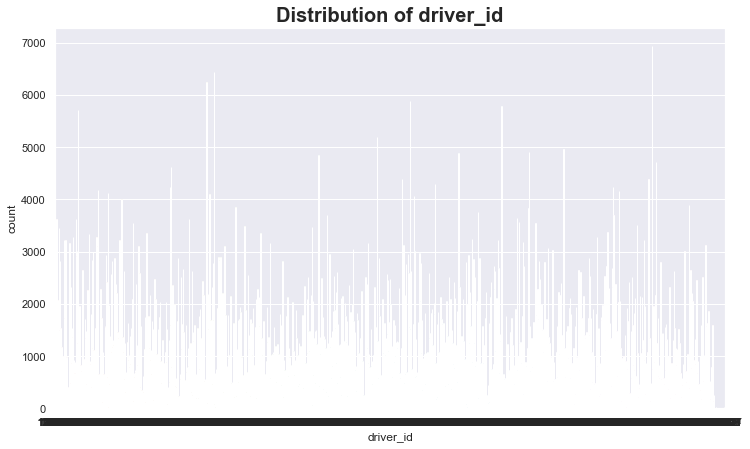

In [22]:
exploration.plot_count(driver_location_data, 'driver_id')

In [23]:
driver_location_data["driver_id"].value_counts()

245538    6941
243020    6447
242971    6258
243676    5884
243932    5793
          ... 
245840       1
247182       1
245907       1
246082       1
246602       1
Name: driver_id, Length: 1213, dtype: int64

In [24]:
driver_location_data.columns, nb_data.columns

(Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
        'created_at'],
       dtype='object'),
 Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
        'Trip End Time'],
       dtype='object'))

In [48]:
# First 15 features
data_dia = driver_location_data
data = nb_data
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([driver_location_data,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(x="features", y="value", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

In [ ]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 11, xycoords = ax.transAxes)
# First 15 features
data = pd.concat([driver_location_data,nb_data.iloc[:,0:8]],axis=1)
plt.figure(figsize=(20,20))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(corr)

LinAlgError: singular matrix

<Figure size 1440x1440 with 0 Axes>

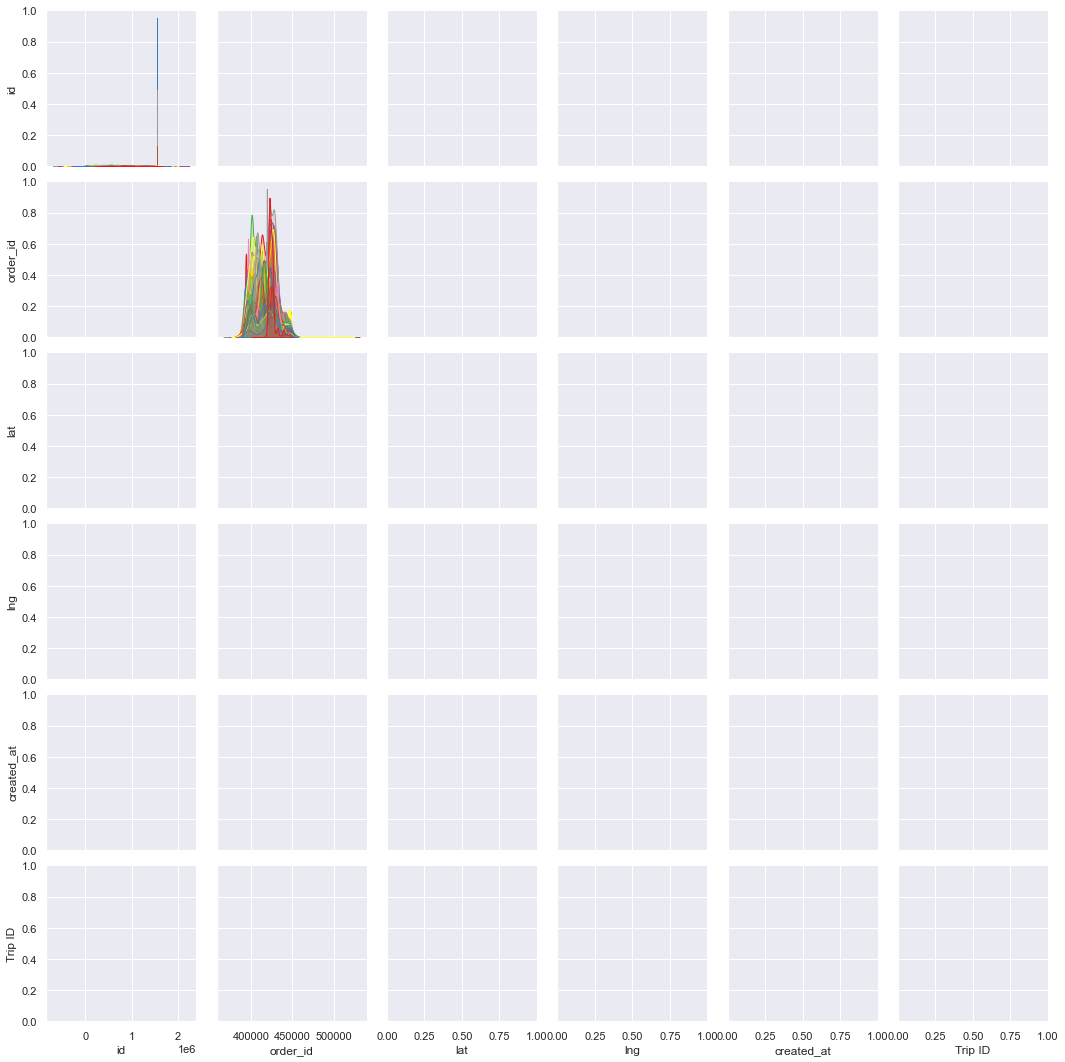

In [29]:
data = pd.concat([driver_location_data, nb_data],axis=1)
plt.figure(figsize=(20,20))
grid=sns.pairplot(data=data,kind ="scatter",hue="driver_id",palette="Set1")
grid = grid.map_upper(corr)